In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
train = pd.read_csv('F:/aliyuun_datas/DC/train.csv')
test = pd.read_csv('F:/aliyuun_datas/DC/test_noLabel.csv')

train.shape, test.shape

((5227, 16), (1307, 15))

In [3]:
train.head(3)   # 查看训练集前三行

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
0,0,One year,No,No internet service,No,24.150000,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,1505.900000,Male,60,No
1,1,Month-to-month,No,No,Fiber optic,76.142284,Yes,No,Electronic check,Yes,0,No,946.581518,Female,12,Yes
2,2,Month-to-month,Yes,No internet service,No,26.200000,Yes,Yes,Electronic check,Yes,0,No internet service,1077.500000,Female,40,No


In [4]:
train.info()    # 查看训练集特征的数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5227 non-null   int64  
 1   Contract          5227 non-null   object 
 2   Dependents        5227 non-null   object 
 3   DeviceProtection  5227 non-null   object 
 4   InternetService   5227 non-null   object 
 5   MonthlyCharges    5227 non-null   float64
 6   MultipleLines     5227 non-null   object 
 7   Partner           5227 non-null   object 
 8   PaymentMethod     5227 non-null   object 
 9   PhoneService      5227 non-null   object 
 10  SeniorCitizen     5227 non-null   int64  
 11  TVProgram         5227 non-null   object 
 12  TotalCharges      5227 non-null   float64
 13  gender            5227 non-null   object 
 14  tenure            5227 non-null   int64  
 15  Label             5227 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory

In [27]:
train.isnull().any().sum()  # 数据当中无缺失值

0

In [5]:
train.describe(include= 'all')  # 查看训练集的基本统计量

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
count,5227.000000,5227,5227,5227,5227,5227.000000,5227,5227,5227,5227,5227.000000,5227,5227.000000,5227,5227.000000,5227
unique,NaN,3,2,3,3,NaN,3,2,4,2,NaN,3,NaN,2,NaN,2
top,NaN,Month-to-month,No,No,Fiber optic,NaN,No,No,Electronic check,Yes,NaN,No,NaN,Female,NaN,No
freq,NaN,3386,4049,2777,2803,NaN,2542,3014,2517,4857,NaN,2292,NaN,2650,NaN,3280
mean,2613.000000,NaN,NaN,NaN,NaN,66.823765,NaN,NaN,NaN,NaN,0.118615,NaN,2084.477153,NaN,28.775971,NaN
std,1509.049259,NaN,NaN,NaN,NaN,28.862749,NaN,NaN,NaN,NaN,0.323366,NaN,2183.825066,NaN,24.293077,NaN
min,0.000000,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,0.000000,NaN,18.800000,NaN,0.000000,NaN
25%,1306.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,0.000000,NaN,292.979609,NaN,5.000000,NaN
50%,2613.000000,NaN,NaN,NaN,NaN,74.200000,NaN,NaN,NaN,NaN,0.000000,NaN,1218.650000,NaN,23.000000,NaN
75%,3919.500000,NaN,NaN,NaN,NaN,89.900000,NaN,NaN,NaN,NaN,0.000000,NaN,3373.825000,NaN,51.000000,NaN


In [6]:
# 查看训练集字符类型特征值种类的个数
for col in list(train.columns):
    if type(train[col].unique()[0]) is str:
        print(col, train[col].unique())

Contract ['One year' 'Month-to-month' 'Two year']
Dependents ['No' 'Yes']
DeviceProtection ['No internet service' 'No' 'Yes']
InternetService ['No' 'Fiber optic' 'DSL']
MultipleLines ['Yes' 'No' 'No phone service']
Partner ['Yes' 'No']
PaymentMethod ['Bank transfer (automatic)' 'Electronic check' 'Mailed check'
 'Credit card (automatic)']
PhoneService ['Yes' 'No']
TVProgram ['No internet service' 'No' 'Yes']
gender ['Male' 'Female']
Label ['No' 'Yes']


In [7]:
# 找出训练集中object类型的特征
object_cols = [col for col in train.columns if train[col].dtype == 'object']
print(object_cols)
# 再找出只有俩中值的特征
labelcol = [col for col in object_cols if train[col].nunique()==2]
print(labelcol)

# 找出测试机中object类型的特征
test_object_cols = [col for col in test.columns if test[col].dtype =='object']
print(labelcol)
# 再找出只有俩中值的特征
test_labelcol = [col for col in test_object_cols if test[col].nunique()==2]
print(test_labelcol)

['Contract', 'Dependents', 'DeviceProtection', 'InternetService', 'MultipleLines', 'Partner', 'PaymentMethod', 'PhoneService', 'TVProgram', 'gender', 'Label']
['Dependents', 'Partner', 'PhoneService', 'gender', 'Label']
['Dependents', 'Partner', 'PhoneService', 'gender', 'Label']
['Dependents', 'Partner', 'PhoneService', 'gender']


In [8]:
# 对类别特征硬编码
from sklearn.preprocessing import LabelEncoder  # 硬编码
label_encoder = LabelEncoder()
for col in labelcol:
    train[col] = label_encoder.fit_transform(train[col])
for col in test_labelcol:
    test[col] = label_encoder.fit_transform(test[col])

In [9]:
# 找出要用独热编码的特征
onehotcol = [col for col in object_cols if train[col].nunique()>2]

# 独热编码
dum_train = pd.get_dummies(train[onehotcol])
dum_train = dum_train.astype('int')
dum_test = pd.get_dummies(test[onehotcol])
dum_test = dum_test.astype('int')

dum_train

,Contract_Month-to-month,Contract_One year,Contract_Two year,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TVProgram_No,TVProgram_No internet service,TVProgram_Yes
0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
5223,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0
5224,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1
5225,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1


In [10]:
# 合并
train.drop(onehotcol, axis=1, inplace = True)
test.drop(onehotcol, axis=1, inplace = True)

train = pd.concat([dum_train,train],axis=1)
test = pd.concat([dum_test, test], axis=1)

train.shape, test.shape

((5227, 29), (1307, 28))

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Contract_Month-to-month                  5227 non-null   int32  
 1   Contract_One year                        5227 non-null   int32  
 2   Contract_Two year                        5227 non-null   int32  
 3   DeviceProtection_No                      5227 non-null   int32  
 4   DeviceProtection_No internet service     5227 non-null   int32  
 5   DeviceProtection_Yes                     5227 non-null   int32  
 6   InternetService_DSL                      5227 non-null   int32  
 7   InternetService_Fiber optic              5227 non-null   int32  
 8   InternetService_No                       5227 non-null   int32  
 9   MultipleLines_No                         5227 non-null   int32  
 10  MultipleLines_No phone service           5227 no

# <font color=orange>查看特征关联性</font>

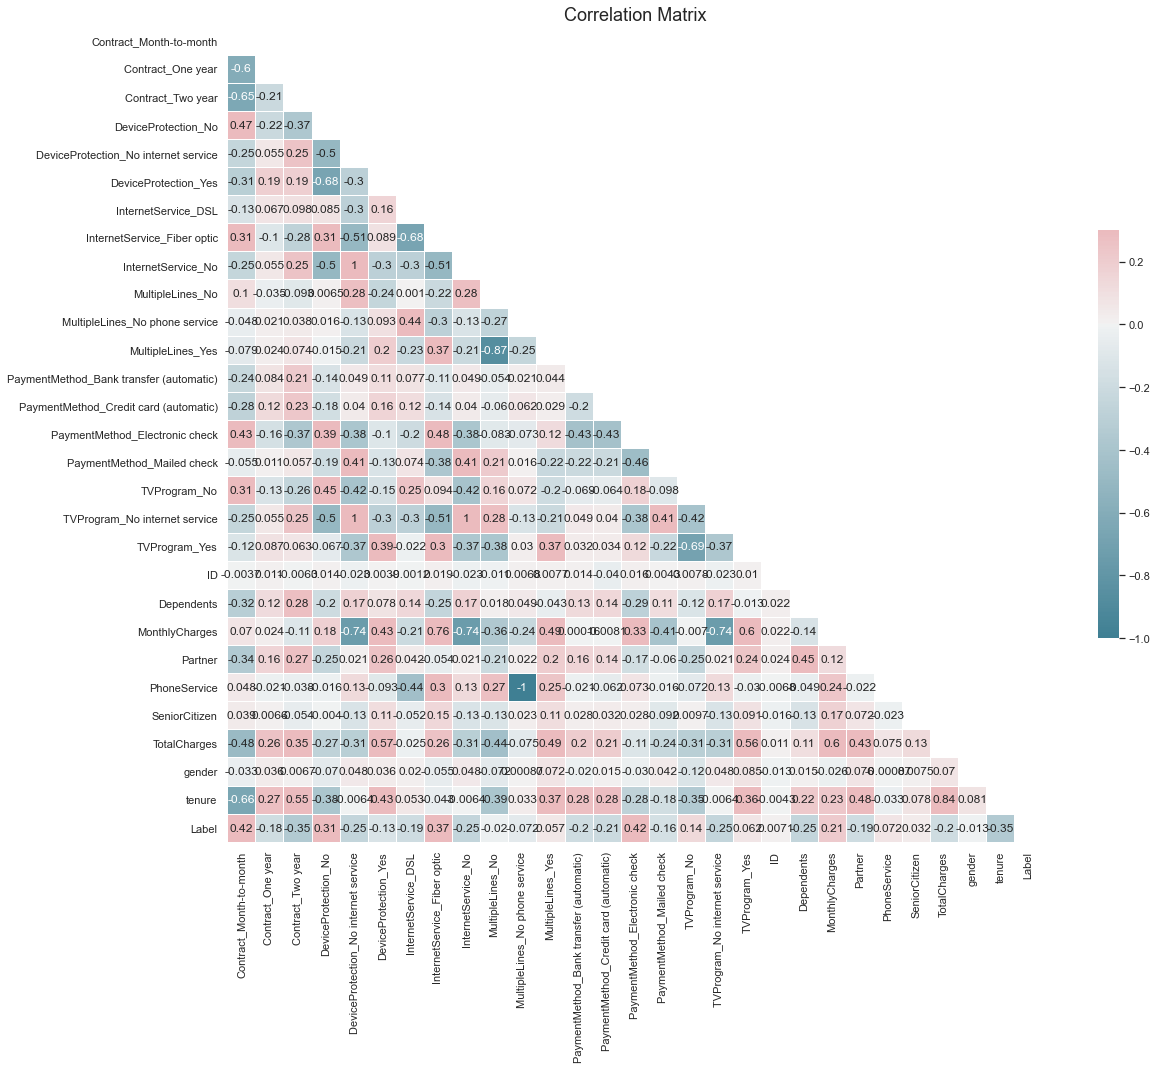

In [12]:
# 生成correlation matrix查看关联
sns.set(style="white")
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [13]:
# 把与label关联低的特征去掉
dropcol = ['MultipleLines_No phone service','MultipleLines_Yes','MultipleLines_No',
           'TVProgram_Yes','ID','SeniorCitizen',
          'PhoneService','gender']
train.drop(dropcol, axis = 1,inplace = True)
test.drop(dropcol, axis = 1, inplace = True)

In [14]:
# 划分样本和标签
X = train.drop('Label', axis=1)
y = train['Label']

In [15]:
# 检查Label比例
num_yes = train.Label.sum()
num_yes

1947

In [16]:
# 检查Label比例
num_no = train.shape[0]-num_yes
num_no

3280

In [17]:
# 数据集不平衡，后续采用StratifiedKFold分层采样
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [18]:
# 导入库
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV    # 调参
from sklearn.model_selection import KFold, StratifiedKFold  # 交叉验证、分层采样
from sklearn.pipeline import Pipeline   
from sklearn.preprocessing import MinMaxScaler  # 归一化

In [19]:
# 构建模型
def model_select(X_train,y_train,clf,clf_name,parameters,kfold):
    pipeline = Pipeline([('scaler', MinMaxScaler()),(clf_name, clf)])
    #数据不平衡，采用StratifiedKFold分层采样
    folder = StratifiedKFold(n_splits = kfold, shuffle = True, random_state=0)
    
    grid_search = GridSearchCV(estimator = pipeline,    # 网格搜索
                              param_grid = parameters,
                              cv = folder,
                              scoring = 'accuracy')
    gs = grid_search.fit(X_train, y_train)
    print('最优参数{},最优分数{}'.format(gs.best_params_, gs.best_score_))
    return gs

# <font color=yellow>决策树</font>
## 评估指标：AUC
## 调参：网格搜索

In [20]:
from sklearn.metrics import accuracy_score   # 使用AUC评估指标

no_folds = 10
dt = DecisionTreeClassifier(random_state = 1)
dt_parameters ={'dt__max_depth':[4,5,6,7,9]}
dt_model = model_select(X_train,y_train,dt,'dt',dt_parameters,no_folds)
y_pred = dt_model.predict(X_valid)
print(accuracy_score(y_valid,y_pred))

最优参数{'dt__max_depth': 5},最优分数0.775888707448813
0.754302103250478


# <font color=yellow>随机森林</font>
## 评估指标：AUC
## 调参：网格搜索

In [21]:
# Random Forest
no_folds = 10
rf = RandomForestClassifier(random_state = 1)
rf_parameters = {'rf__max_depth':[4,5,6,7,8]}
rf_model = model_select(X_train,y_train,rf,'rf',rf_parameters,no_folds)
y_pred = rf_model.predict(X_valid)
print(accuracy_score(y_valid,y_pred))

最优参数{'rf__max_depth': 7},最优分数0.7756471891379567
0.7648183556405354


# <font color=yellow>SVM</font>
## 评估指标：AUC
## 调参：网格搜索

In [22]:
# SVM
no_folds = 10
svc = SVC(random_state = 1)
svc_parameters = {'svc__C':[0.01,0.03,0.1,1,1.5], 'svc__gamma':[0.01,0.1,1,1.5]}
svc_model = model_select(X_train,y_train,svc,'svc',svc_parameters,no_folds)
y_pred = svc_model.predict(X_valid)
print(accuracy_score(y_valid,y_pred))

最优参数{'svc__C': 0.1, 'svc__gamma': 1},最优分数0.7627313836772448
0.7562141491395793


# <font color=yellow>XGB 集成模型</font>
## 评估指标：AUC
## 调参：网格搜索

In [23]:
# xgboost
no_folds = 10
xgb = XGBClassifier(random_state = 1)
xgb_parameters = {'xgboost__max_depth':[4,5,6,7,8,9],
                 'xgboost__learning_rate':[0.001,0.01,0.02,0.03,1]}
xgb_model = model_select(X_train,y_train,xgb,'xgboost',xgb_parameters,no_folds)
y_pred = xgb_model.predict(X_valid)
print(accuracy_score(y_valid,y_pred))

[20:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [24]:
xgb_model = XGBClassifier(random_state = 1, max_depth = 6, learning_rate = 0.03)
xgb_model.fit(X,y)
preds = xgb_model.predict(test)

final_DF = pd.DataFrame()
get_ID = pd.read_csv('F:/aliyuun_datas/DC/test_noLabel.csv')
final_DF['ID'] = get_ID['ID']
final_DF['Label'] = pd.Series(preds).map({1:'Yes',0:'No'})
final_DF
# Name = '客户流失判断结果.csv'
# final_DF.to_csv

[20:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,ID,Label
0,5227,No
1,5228,No
2,5229,No
3,5230,No
4,5231,No
...,...,...
1302,6529,Yes
1303,6530,Yes
1304,6531,Yes
1305,6532,Yes
